In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#number of rows and columns 
insurance_dataset.shape

(1338, 7)

In [9]:
#getting information on the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


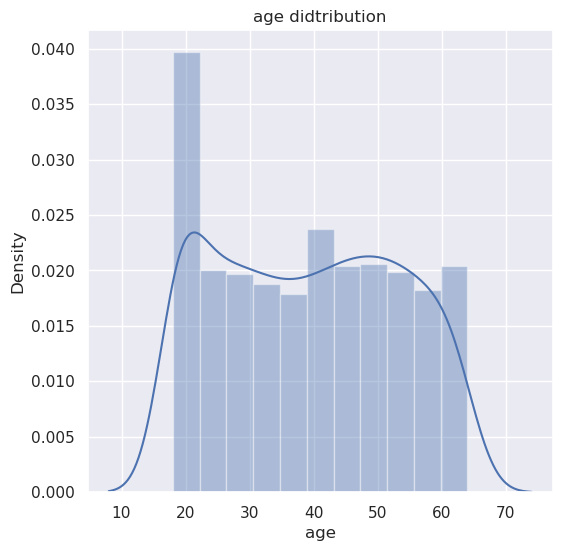

In [11]:
#distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('age didtribution')
plt.show()

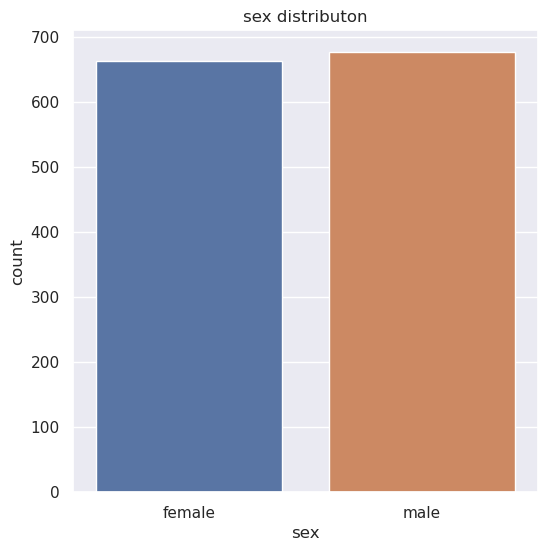

In [12]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex distributon')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


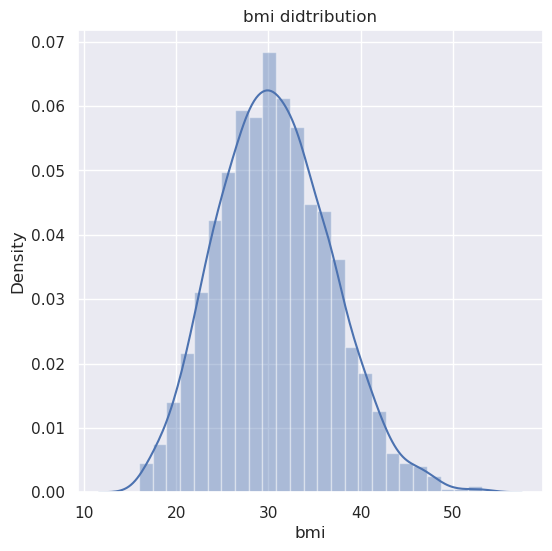

In [14]:
#bmi distribution in our dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi didtribution')
plt.show()

In [18]:
insurance_dataset['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

the normal bmi range of a person is between 18.5 to 24.9
from our observation we can see thet most of or observations are overweight.

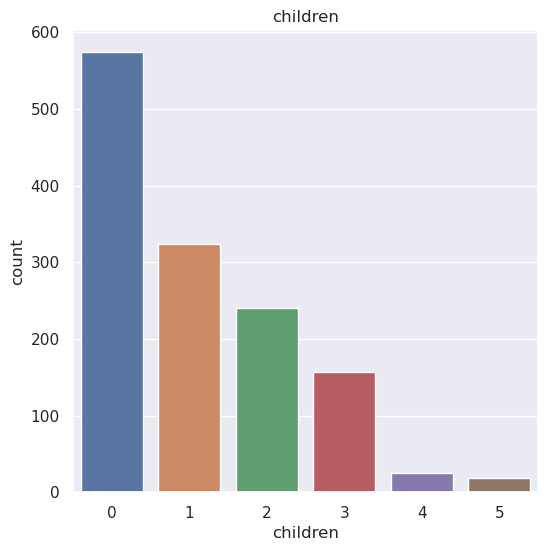

In [16]:
#the children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [19]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

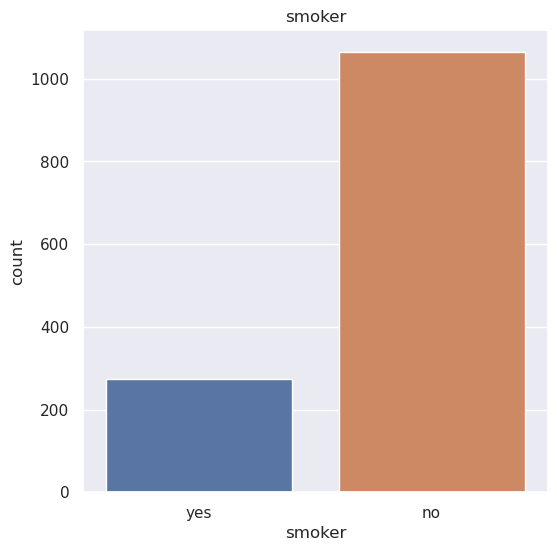

In [17]:
#the smokers column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [20]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

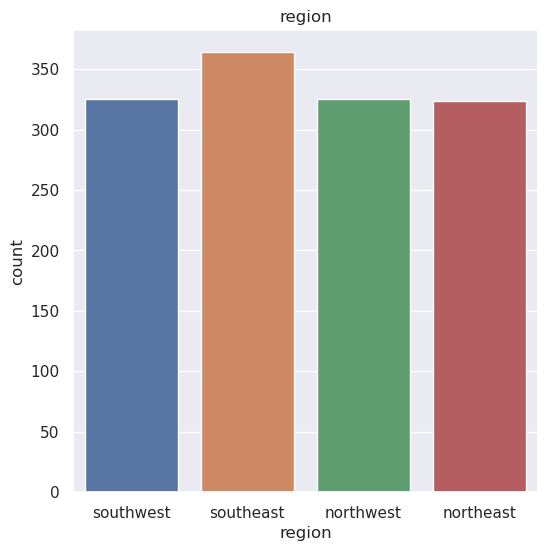

In [21]:
#the regions column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [22]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


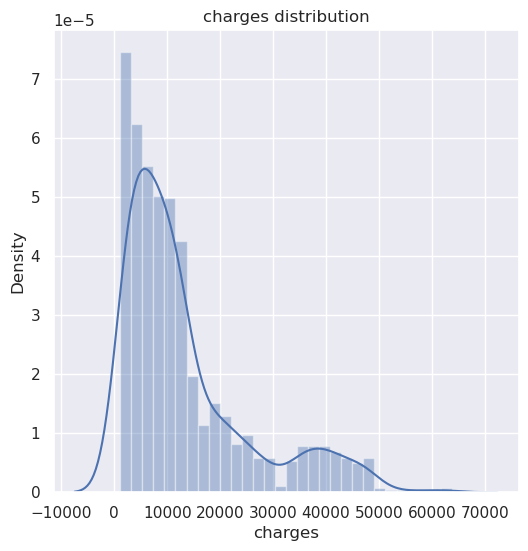

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

# Data Pre-processing

encoding the cartegorical features

In [39]:
#encodong sex column
insurance_dataset.replace({"sex":{"male":0, 'female':1}}, inplace=True)

#encoding smoker column
insurance_dataset.replace({"smoker":{"yes":0, 'no':1}}, inplace=True)

#encoding region column
insurance_dataset.replace({"region":{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

# spliting the features and target

In [44]:
X=insurance_dataset.drop('charges',axis=1)
y=insurance_dataset['charges']

In [66]:
X.shape

(1338, 6)

# splitting the data into splitting data and training data

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [68]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Taraining

Regression model

In [69]:
#loading a linear regression model
regressor=LinearRegression()

In [70]:
regressor.fit(X_train, y_train)

LinearRegression()

# model evaluation

In [71]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [72]:
#R squared value
r2_train=metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [73]:
#R squared value
r2_test=metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.751505643411174


# building a predictive model

In [76]:
input_data = (31,1,25,0,1,0)

#changing input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print("the insureance cost in USD is ",prediction[0])

[3515.40226154]
the insureance cost in USD is  3515.4022615353715


/home/user/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
